In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import sys
sys.path.append('Desktop/Columbia%20Engineering/Project%20Uno/SK%20Project%20Folder/')
import exp
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as lm


#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the given problem is a classificaton problem. Hence linear regression is used for ML algorithm
from sklearn.linear_model import LinearRegression

In [100]:
file = "bk_one_fam.csv"
one_fam_3years = pd.read_csv(file)
one_fam_3years = one_fam_3years.drop(columns=['Unnamed: 0', 'Unnamed: 0.1' ])
one_fam_3years.head()

,building_class_category,sale_price,gross_sqft,year_of_sale,year_built,ZipCode,neighborhood,residential_units,SchoolDist,BldgClass,YearAlter1,YearAlter2,LotArea,ResArea,UnitsRes,NumFloors,SP/Sq_ft
0,01 ONE FAMILY HOMES,2950000.0,1692.0,2017,2014,11249.0,WILLIAMSBURG-SOUTH,1,14.0,A5,2013.0,0.0,1279.0,1692.0,1.0,3.0,1743.498818
1,01 ONE FAMILY HOMES,2930000.0,1476.0,2016,1920,11209.0,BAY RIDGE,1,20.0,A3,0.0,0.0,7000.0,1476.0,1.0,2.0,1985.094851
2,01 ONE FAMILY HOMES,2900000.0,1152.0,2016,1920,11211.0,WILLIAMSBURG-EAST,1,14.0,A5,2006.0,0.0,2500.0,1152.0,1.0,3.0,2517.361111
3,01 ONE FAMILY HOMES,2800187.0,2733.0,2017,2016,11231.0,RED HOOK,1,15.0,A5,0.0,0.0,1752.0,2733.0,1.0,3.0,1024.583608
4,01 ONE FAMILY HOMES,2755000.0,2500.0,2017,1901,11215.0,SUNSET PARK,1,15.0,A5,2015.0,0.0,2504.0,2500.0,1.0,3.0,1102.000000


In [19]:
print(one_fam_3years.columns)
len(one_fam_3years)

Index(['building_class_category', 'sale_price', 'gross_sqft', 'year_of_sale',
       'year_built', 'ZipCode', 'neighborhood', 'residential_units',
       'SchoolDist', 'BldgClass', 'YearAlter1', 'YearAlter2', 'LotArea',
       'ResArea', 'UnitsRes', 'NumFloors', 'SP/Sq_ft', 'SchoolDist_A'],
      dtype='object')


6079

# Data Analysis & Visualization

In [101]:
#Add Alphabetical School District for Plot
one_fam_3years["SchoolDist_A"] = one_fam_3years["SchoolDist"] 
one_fam_3years["SchoolDist_A"]= one_fam_3years["SchoolDist_A"].apply(str)
one_fam_3years["SchoolDist_A"] = one_fam_3years["SchoolDist_A"].replace(
    {'13.0': '3', '14.0': '2.5','15.0': '5','16.0': '2.5','17.0': '6.5','18.0': '5.5','19.0': '5.5',
     '20.0': '7.5','21.0': '6.5', '22.0': '8','23.0': '2.5','32.0': '2.5'})
one_fam_3years["SchoolDist_B"] = one_fam_3years["SchoolDist"]
one_fam_3years["SchoolDist_B"]= one_fam_3years["SchoolDist_B"].apply(str)
one_fam_3years["SchoolDist_B"] = one_fam_3years["SchoolDist_B"].replace(
    {'13.0': '8', '14.0': '8','15.0': '7','16.0': '5','17.0': '6','18.0': '4','19.0': '4',
     '20.0': '5','21.0': '5', '22.0': '5','23.0': '4','32.0': '6'})

one_fam_3years.head()

,building_class_category,sale_price,gross_sqft,year_of_sale,year_built,ZipCode,neighborhood,residential_units,SchoolDist,BldgClass,YearAlter1,YearAlter2,LotArea,ResArea,UnitsRes,NumFloors,SP/Sq_ft,SchoolDist_A,SchoolDist_B
0,01 ONE FAMILY HOMES,2950000.0,1692.0,2017,2014,11249.0,WILLIAMSBURG-SOUTH,1,14.0,A5,2013.0,0.0,1279.0,1692.0,1.0,3.0,1743.498818,2.5,8
1,01 ONE FAMILY HOMES,2930000.0,1476.0,2016,1920,11209.0,BAY RIDGE,1,20.0,A3,0.0,0.0,7000.0,1476.0,1.0,2.0,1985.094851,7.5,5
2,01 ONE FAMILY HOMES,2900000.0,1152.0,2016,1920,11211.0,WILLIAMSBURG-EAST,1,14.0,A5,2006.0,0.0,2500.0,1152.0,1.0,3.0,2517.361111,2.5,8
3,01 ONE FAMILY HOMES,2800187.0,2733.0,2017,2016,11231.0,RED HOOK,1,15.0,A5,0.0,0.0,1752.0,2733.0,1.0,3.0,1024.583608,5,7
4,01 ONE FAMILY HOMES,2755000.0,2500.0,2017,1901,11215.0,SUNSET PARK,1,15.0,A5,2015.0,0.0,2504.0,2500.0,1.0,3.0,1102.000000,5,7


### Scatter Plots 

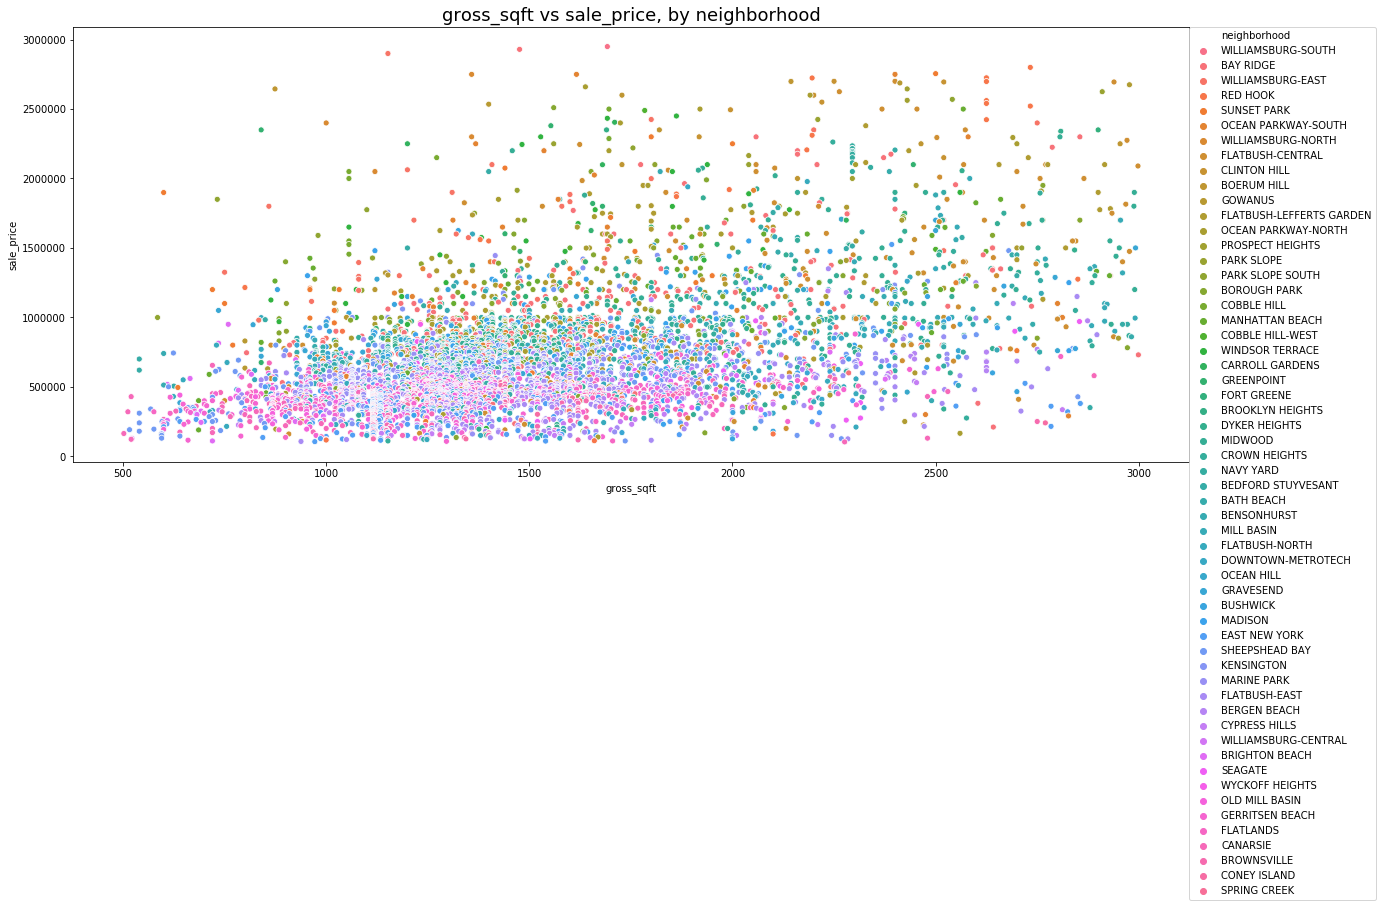

In [5]:
exp.plot_bivariate(one_fam_3years, 'gross_sqft', 'sale_price', hue='neighborhood', alpha=1.0)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0.)
plt.savefig('Neighborhood_Scatter.png')

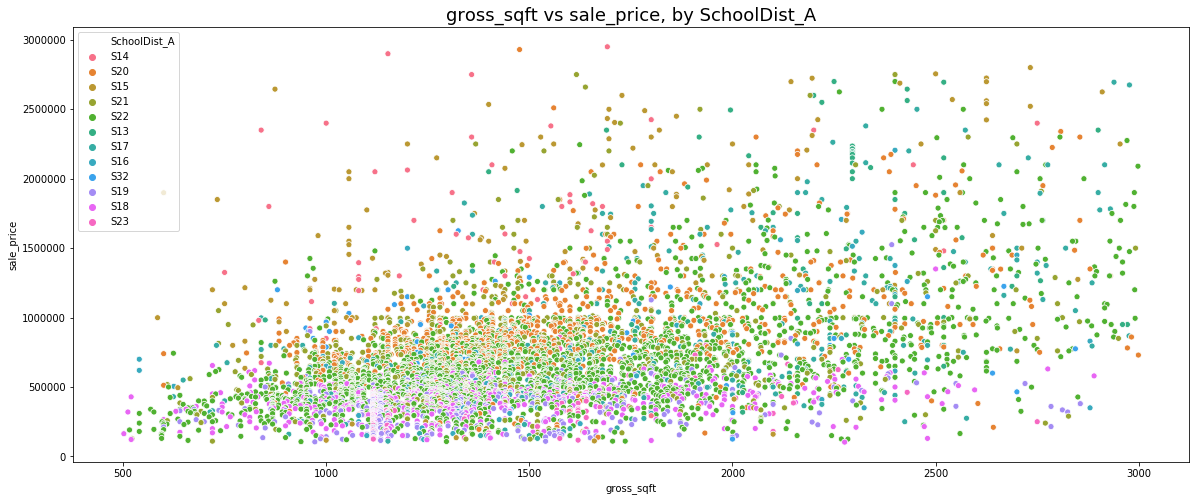

In [6]:
exp.plot_bivariate(one_fam_3years, 'gross_sqft', 'sale_price', hue='SchoolDist_A', alpha=1.0)
plt.savefig('School_Scatter.png')

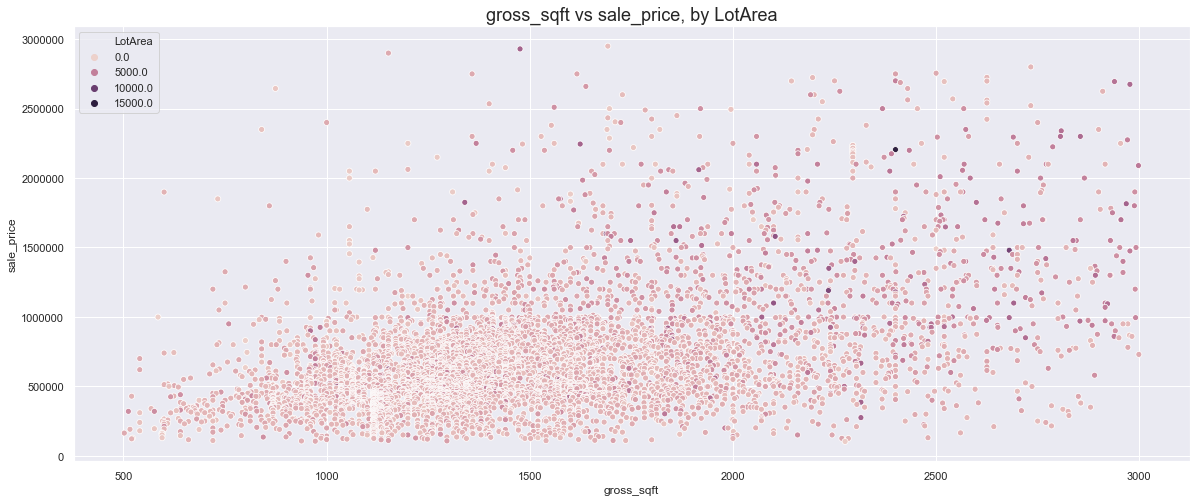

In [74]:
exp.plot_bivariate(one_fam_3years, 'gross_sqft', 'sale_price', hue='LotArea', alpha=0.99)

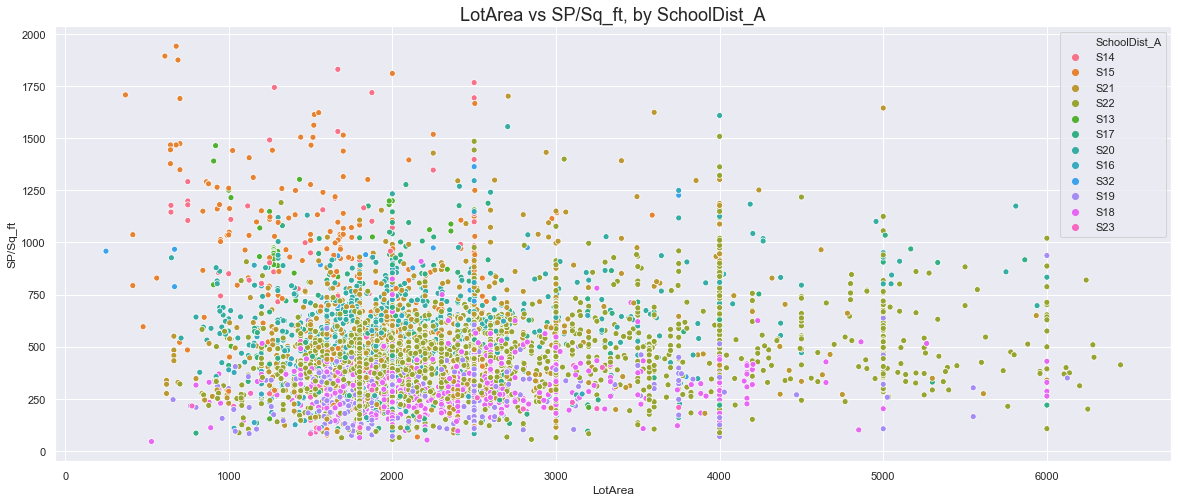

In [75]:
one_fam_3years_lot = one_fam_3years.loc[(one_fam_3years["LotArea"]<6500)&
                                    (one_fam_3years["SP/Sq_ft"] < 2000),:]
exp.plot_bivariate(one_fam_3years_lot , 'LotArea', 'SP/Sq_ft', hue='SchoolDist_A', alpha=1.0)

### The Big Picture  

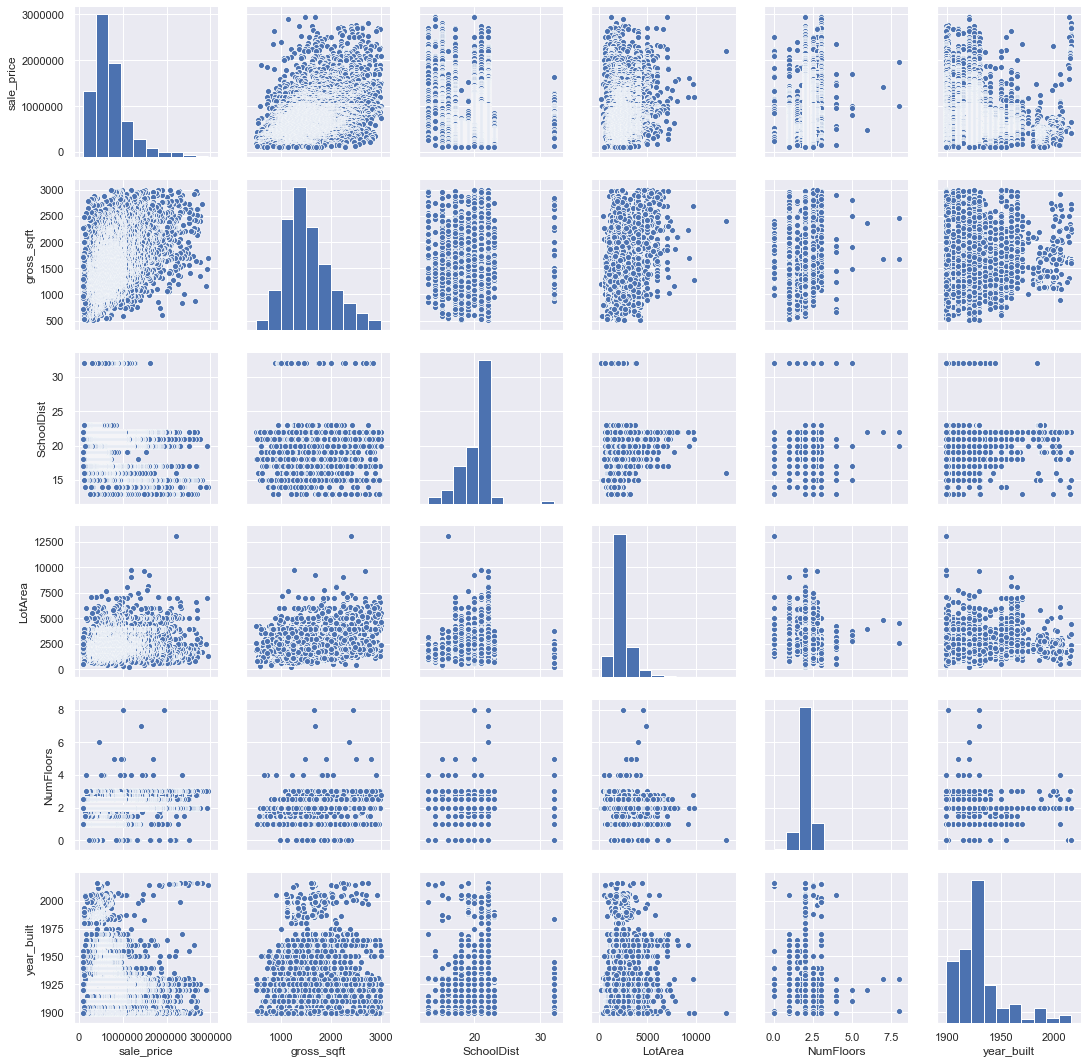

<Figure size 432x288 with 0 Axes>

In [8]:
#scatterplot
sns.set()
cols = ['sale_price', 'gross_sqft', 
        'SchoolDist', 'LotArea', 'NumFloors', 'year_built']
sns.pairplot(one_fam_3years[cols], size = 2.5)
plt.show();
plt.savefig('Big_picture.png')

## Box Plots

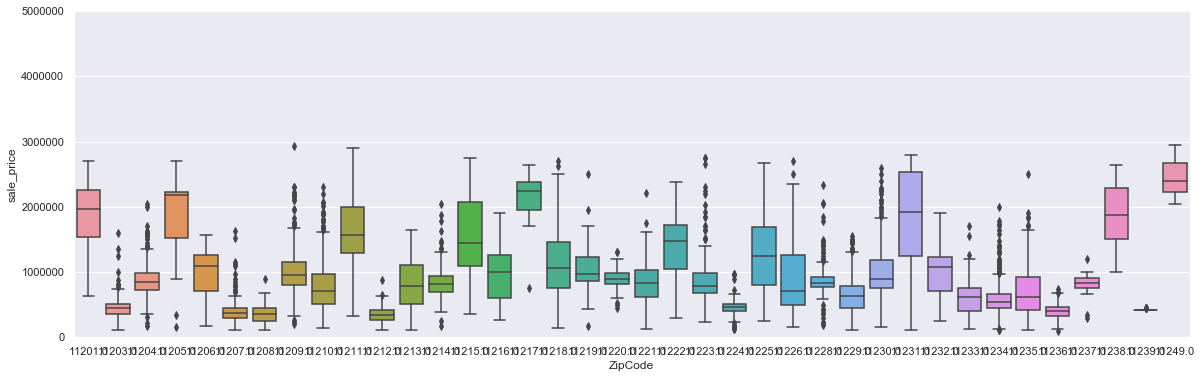

In [41]:
#box plot zipcode/saleprice
var = one_fam_3years["ZipCode"]
SP = one_fam_3years["sale_price"]
data = pd.concat([SP, var], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y=SP, data=data)
fig.axis(ymin=0, ymax=5000000);

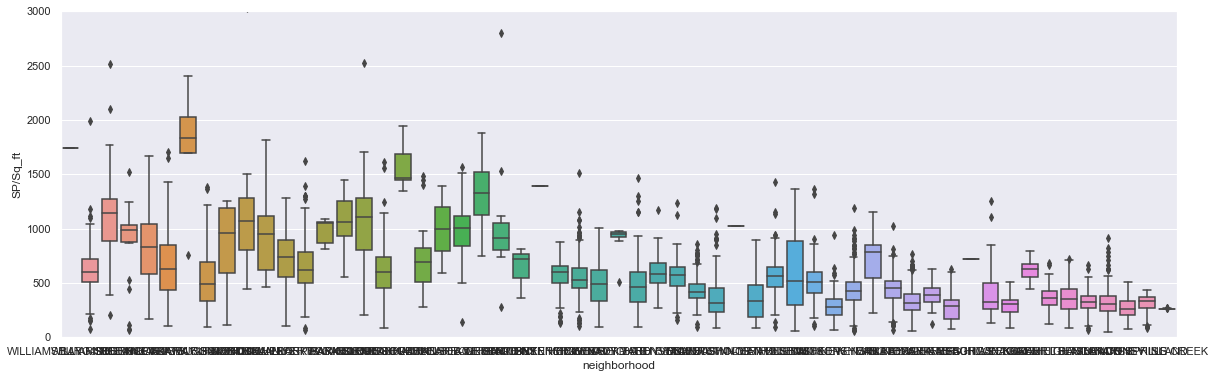

In [40]:
#box plot Neighbourhood vs SP/sq.ft
var = one_fam_3years["neighborhood"]
SP = one_fam_3years["SP/Sq_ft"]
data = pd.concat([SP, var], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y=SP, data=data)
fig.axis(ymin=0, ymax=3000);

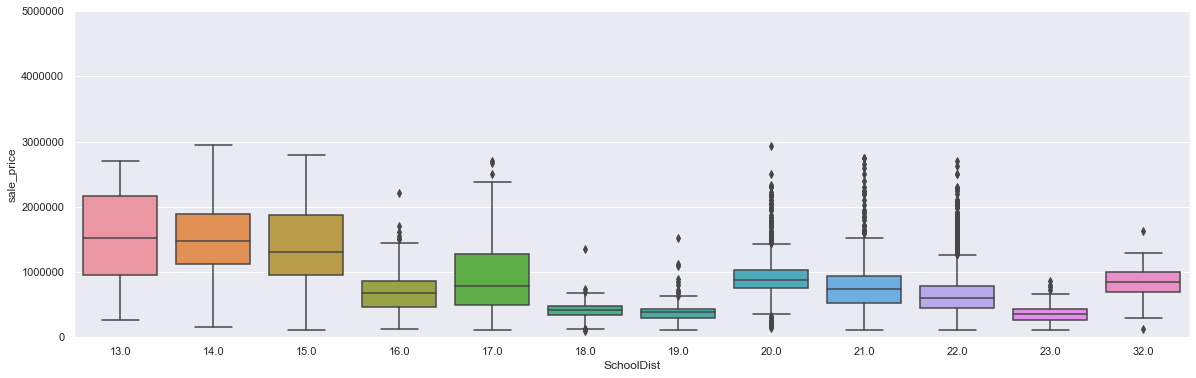

In [43]:
#box plot School Dist vs SP/sq.ft
var = one_fam_3years["SchoolDist"]
SP = one_fam_3years["sale_price"]
data = pd.concat([SP, var], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y=SP, data=data)
fig.axis(ymin=0, ymax=5000000);

In [ ]:
#box plot School Dist vs SP/sq.ft
var = one_fam_3years["SchoolDist"]
SP = one_fam_3years["sale_price"]
data = pd.concat([SP, var], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y=SP, data=data)
fig.axis(ymin=0, ymax=3000);
#plt.savefig('school_box.png')

### Heat Maps

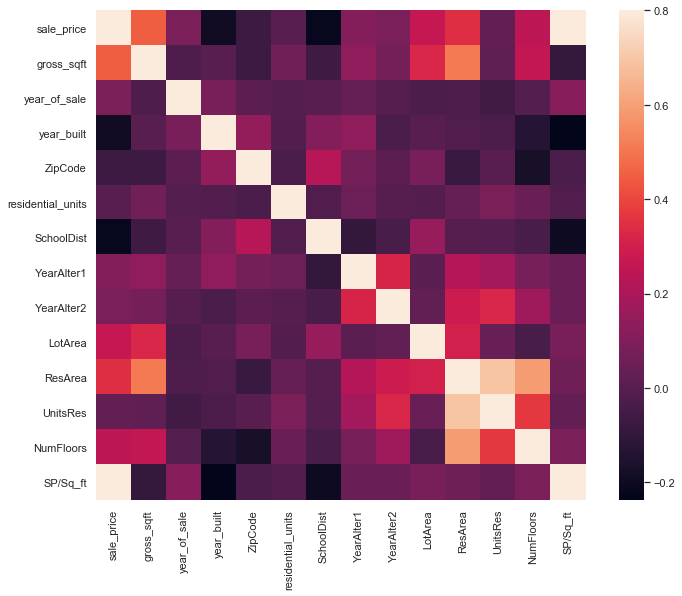

In [24]:
#correlation matrix
corrmat = one_fam_3years.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#plt.savefig('Heat1.png')

sale_price      1.000000
SP/Sq_ft        0.799992
gross_sqft      0.448373
ResArea         0.345071
LotArea         0.265926
NumFloors       0.246375
SchoolDist     -0.219224
year_built     -0.189676
YearAlter1      0.110347
year_of_sale    0.089693
Name: sale_price, dtype: float64

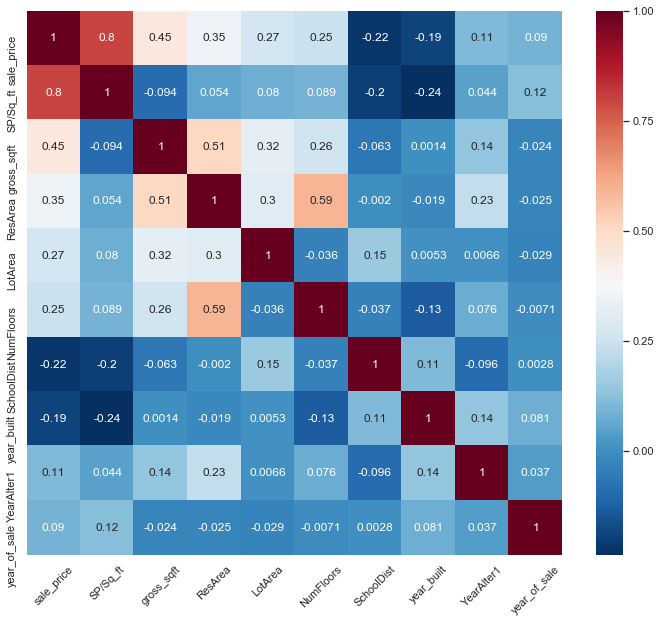

In [86]:
#one_fam_3years_f = one_fam_3years.astype(float)
exp.plot_correlations(one_fam_3years, 'sale_price', limit=10, annot=True)

In [88]:
print("Find most important features relative to target")
corr = one_fam_3years.corr()
corr.sort_values(["sale_price"], ascending = False, inplace = True)
print(corr.sale_price)

Find most important features relative to target
sale_price           1.000000
SP/Sq_ft             0.799992
gross_sqft           0.448373
ResArea              0.345071
LotArea              0.265926
NumFloors            0.246375
YearAlter1           0.110347
year_of_sale         0.089693
YearAlter2           0.086384
UnitsRes             0.029900
residential_units    0.001934
ZipCode             -0.070386
year_built          -0.189676
SchoolDist          -0.219224
Name: sale_price, dtype: float64


# Linear Regression 


### Define Datasets 

In [137]:
#Combined Dataset
dfcombine = one_fam_3years
#dfcombine = dfcombine.reset_index(inplace=True, drop=True)

#Target Dataset
dfy = pd.DataFrame(one_fam_3years["sale_price"])

#all the independant variables/predictors are named as dfx
dfxx = dfcombine.drop(columns=['building_class_category', 'sale_price',
                              'year_of_sale', 'SchoolDist_A','SchoolDist_B', 'SP/Sq_ft'])
dfx = dfxx.drop(columns=['ZipCode', 'neighborhood',
                              'residential_units', 'SchoolDist', 'BldgClass', 'UnitsRes'])
dfx.head()

,gross_sqft,year_built,YearAlter1,YearAlter2,LotArea,ResArea,NumFloors,PPP
0,1692.0,2014,2013.0,0.0,1279.0,1692.0,3.0,68.0
1,1476.0,1920,0.0,0.0,7000.0,1476.0,2.0,12.0
2,1152.0,1920,2006.0,0.0,2500.0,1152.0,3.0,8.0
3,2733.0,2016,0.0,0.0,1752.0,2733.0,3.0,32.0
4,2500.0,1901,2015.0,0.0,2504.0,2500.0,3.0,0.0


In [138]:
dfy.head()

,sale_price
0,2950000.0
1,2930000.0
2,2900000.0
3,2800187.0
4,2755000.0


### Analysis of combined dataset 

In [117]:
one_fam_3years['SchoolDist_A'] = pd.to_numeric(one_fam_3years['SchoolDist_A'])
one_fam_3years['SchoolDist_B'] = pd.to_numeric(one_fam_3years['SchoolDist_B'])
one_fam_3years.dtypes

building_class_category     object
sale_price                 float64
gross_sqft                 float64
year_of_sale                 int64
year_built                   int64
ZipCode                    float64
neighborhood                object
residential_units            int64
SchoolDist                 float64
BldgClass                   object
YearAlter1                 float64
YearAlter2                 float64
LotArea                    float64
ResArea                    float64
UnitsRes                   float64
NumFloors                  float64
SP/Sq_ft                   float64
SchoolDist_A               float64
SchoolDist_B                 int64
PPP                        float64
dtype: object

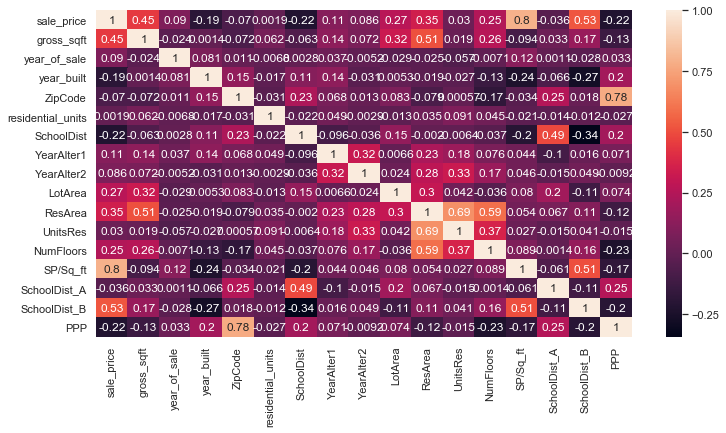

In [118]:
plt.figure(figsize = (12,6))
sns.heatmap(dfcombine.corr(),annot = True)
plt.savefig('Heat2.png')

### Train Set  - Simple Regression Resumed 

In [119]:
dfx.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)
dfy.head()

,sale_price
0,2950000.0
1,2930000.0
2,2900000.0
3,2800187.0
4,2755000.0


In [120]:
#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

In [121]:
# linear regression 
from sklearn.linear_model import LinearRegression
linR = LinearRegression()
linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
#the target is predicted for the test dataset
predictions = linR.predict(X_test)
#the accuracy of the prediction is found to be.... 
linR.score(X_test,y_test)

0.30073044238894997

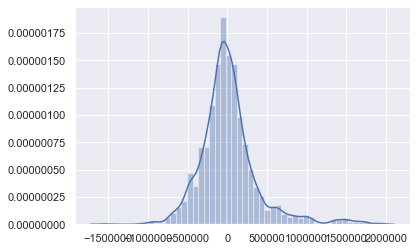

In [123]:
error = y_test - predictions
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

In [100]:
dfx.shape

(6079, 7)

In [124]:
oness = np.ones((6079,1),dtype = int)
dfone = pd.DataFrame(oness, columns = ['ones'])
dfxnew = dfone.join(dfx)
dfxnew.head()

,ones,gross_sqft,year_built,YearAlter1,YearAlter2,LotArea,ResArea,NumFloors,PPP
0,1,1692.0,2014,2013.0,0.0,1279.0,1692.0,3.0,68.0
1,1,1476.0,1920,0.0,0.0,7000.0,1476.0,2.0,12.0
2,1,1152.0,1920,2006.0,0.0,2500.0,1152.0,3.0,8.0
3,1,2733.0,2016,0.0,0.0,1752.0,2733.0,3.0,32.0
4,1,2500.0,1901,2015.0,0.0,2504.0,2500.0,3.0,0.0


In [125]:
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as lm


In [126]:
#OLS Regression
lir_ols = lm.OLS(endog = dfy, exog = dfxnew).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     316.8
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        06:03:22   Log-Likelihood:                -86471.
No. Observations:                6079   AIC:                         1.730e+05
Df Residuals:                    6070   BIC:                         1.730e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones        5.657e+06   3.92e+05     14.416      0.000    4.89e+06    6.43e+06
gross_sqft   297.1447     11.915     24.939      0.000     273.788     320.502
year_built -2922.1456    202.240    -14.449      0.000   -3318.608   -2525.683
YearAlter1    74.4456     10.814      6.884      0.000      53.246      95.645
YearAlter2     1.5027     32.247      0.047      0.963     -61.713      64.719
LotArea       73.2392      5.510     13.291      0.000      62.437      84.042
ResArea       32.7191     12.037      2.718      0.007       9.121      56.317
NumFloors   7.609e+04   1.35e+04      5.617      0.000    4.95e+04    1.03e+05
PPP        -5019.5396    401.469    -12.503      0.000   -5806.562   -4232.517
==============================================================================
Omnibus:                     1924.049   Durbin-Watson:                   0.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8875.056
Skew:                           1.470   Prob(JB):                         0.00
Kurtosis:                       8.138   Cond. No.                     3.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RMSE Model with Plot

In [50]:

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 360705.66033405566
RMSE on Test set : 372384.45708831336


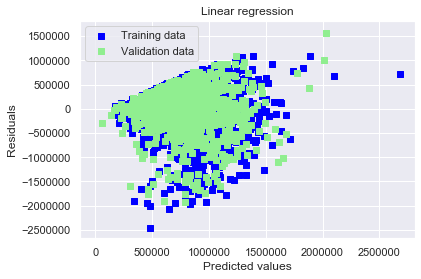

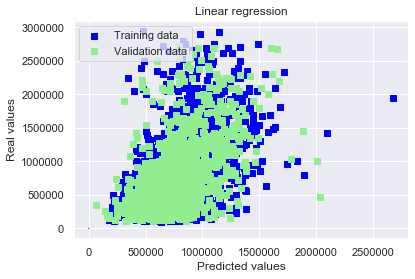

In [131]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

### Once More Run - with fewer variables

In [132]:
dfx2 = dfxnew.drop(['YearAlter1','YearAlter2'], axis = 1)
dfx2.head()

,ones,gross_sqft,year_built,LotArea,ResArea,NumFloors,PPP
0,1,1692.0,2014,1279.0,1692.0,3.0,68.0
1,1,1476.0,1920,7000.0,1476.0,2.0,12.0
2,1,1152.0,1920,2500.0,1152.0,3.0,8.0
3,1,2733.0,2016,1752.0,2733.0,3.0,32.0
4,1,2500.0,1901,2504.0,2500.0,3.0,0.0


In [133]:
#OLS Regression
lir_ols = lm.OLS(endog = dfy, exog = dfx2).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     410.5
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        06:07:15   Log-Likelihood:                -86497.
No. Observations:                6079   AIC:                         1.730e+05
Df Residuals:                    6072   BIC:                         1.731e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones        5.324e+06    3.9e+05     13.636      0.000    4.56e+06    6.09e+06
gross_sqft   301.1390     11.905     25.296      0.000     277.801     324.477
year_built -2752.4100    201.195    -13.680      0.000   -3146.823   -2357.997
LotArea       69.1878      5.502     12.576      0.000      58.403      79.973
ResArea       50.2910     11.604      4.334      0.000      27.543      73.039
NumFloors   6.979e+04   1.36e+04      5.142      0.000    4.32e+04    9.64e+04
PPP        -4792.9288    401.840    -11.927      0.000   -5580.677   -4005.181
==============================================================================
Omnibus:                     1974.432   Durbin-Watson:                   0.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9296.684
Skew:                           1.505   Prob(JB):                         0.00
Kurtosis:                       8.258   Cond. No.                     3.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfx2, dfy, test_size=0.3, random_state=42)
linR2 = LinearRegression()
linR2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
#the target is predicted for the test dataset
predictions = linR2.predict(X_test2)
#the accuracy of the prediction is found to be.... 
linR2.score(X_test2,y_test2)

0.2787506372307691

## Next Steps - Normalisation

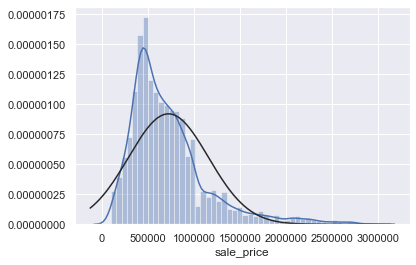

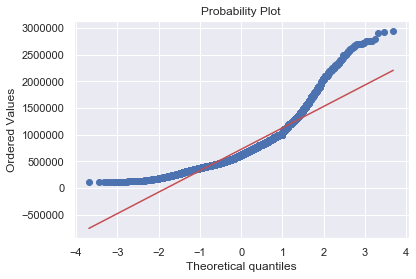

In [48]:
#histogram and normal probability plot
sns.distplot(one_fam_3years['sale_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(one_fam_3years['sale_price'], plot=plt)

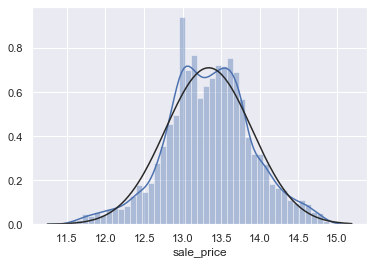

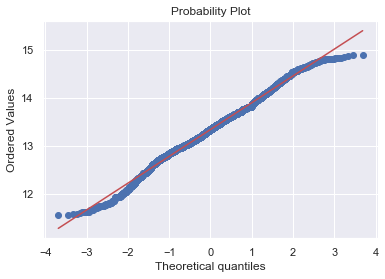

In [49]:
#applying log transformation
y_lg = np.log(one_fam_3years['sale_price'])

#transformed histogram and normal probability plot
sns.distplot(y_lg, fit=norm);
fig = plt.figure()
res = stats.probplot(y_lg, plot=plt)

## Work In Progress / Backups

In [32]:
## Attempt: Convert Neighbourhoods to Numeric and work meaningful correlation 
# Rename Neighborhoods to Numeric
nbh1 = pd.DataFrame(dfcombine['neighborhood'].value_counts())
#nbh = nbh.set_index("neighborhood")
nbh1.reset_index()
#nbh["nb_code"] = nbh.index
nbh1.reset_index()

nbh1.reset_index(inplace=True, drop=False)
nbh1 = nbh1.rename(columns={"index":"Name", "neighborhood": "Count"})
nbh1.reset_index(inplace=True, drop=False)
nbh1 = nbh1.rename(columns={"index":"code"})
#nbh['Name'] = pd.factorize(nbh.Name)[0] +1 

nbh1.head()


,code,Name,Count
0,0,FLATBUSH-EAST,547
1,1,MARINE PARK,478
2,2,BAY RIDGE,327
3,3,CANARSIE,306
4,4,MIDWOOD,284


In [79]:
#add dummy variables to dfcombine to work out correlation... 
dfcombine['nbh_dum'] = dfcombine['neighborhood'] 
dfcombine['nbh_dum'] = pd.factorize(dfcombine.nbh_dum)[0] +1 
dfcombine['bldcl_dum'] = dfcombine['BldgClass'] 
dfcombine['bldcl_dum'] = pd.factorize(dfcombine.bldcl_dum)[0] +1 
dfcombine.head()

,building_class_category,sale_price,gross_sqft,year_of_sale,year_built,ZipCode,neighborhood,residential_units,SchoolDist,BldgClass,...,LotArea,ResArea,UnitsRes,NumFloors,SP/Sq_ft,SchoolDist_A,SchoolDist_B,PPP,nbh_dum,bldcl_dum
0,01 ONE FAMILY HOMES,2950000.0,1692.0,2017,2014,11249.0,WILLIAMSBURG-SOUTH,1,14.0,A5,...,1279.0,1692.0,1.0,3.0,1743.498818,2.5,8,68.0,1,1
1,01 ONE FAMILY HOMES,2930000.0,1476.0,2016,1920,11209.0,BAY RIDGE,1,20.0,A3,...,7000.0,1476.0,1.0,2.0,1985.094851,7.5,5,12.0,2,2
2,01 ONE FAMILY HOMES,2900000.0,1152.0,2016,1920,11211.0,WILLIAMSBURG-EAST,1,14.0,A5,...,2500.0,1152.0,1.0,3.0,2517.361111,2.5,8,8.0,3,1
3,01 ONE FAMILY HOMES,2800187.0,2733.0,2017,2016,11231.0,RED HOOK,1,15.0,A5,...,1752.0,2733.0,1.0,3.0,1024.583608,5.0,7,32.0,4,1
4,01 ONE FAMILY HOMES,2755000.0,2500.0,2017,1901,11215.0,SUNSET PARK,1,15.0,A5,...,2504.0,2500.0,1.0,3.0,1102.000000,5.0,7,0.0,5,1


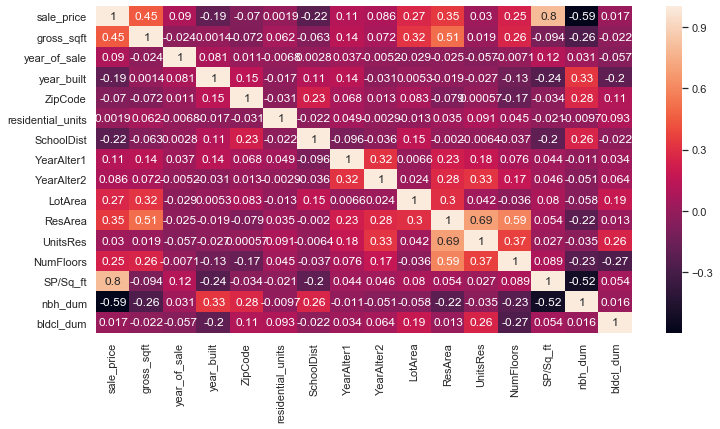

In [93]:
plt.figure(figsize = (12,6))
sns.heatmap(dfcombine.corr(),annot = True)

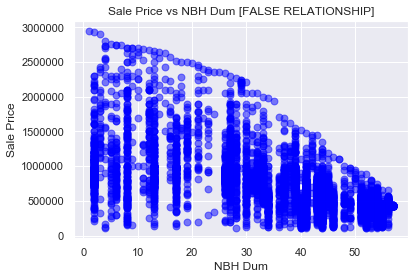

In [94]:
# Sale Price vs neighbourhood (dummy / factored) - Gives Inaccurate relationship due to improper treatment of categorical  
#READ : The Search for Categorical Correlation > https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
N = len(dfcombine)
x = dfcombine['nbh_dum']
y = dfcombine['sale_price']
colors = ("blue")
area = np.pi*15

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Sale Price vs NBH Dum [FALSE RELATIONSHIP]')
plt.xlabel('NBH Dum')
plt.ylabel('Sale Price')
plt.show()


In [79]:
one_fam_3years['sale_price'].describe()

count    6.079000e+03
mean     7.250200e+05
std      4.337171e+05
min      1.030000e+05
25%      4.350000e+05
50%      6.230000e+05
75%      8.880000e+05
max      2.950000e+06
Name: sale_price, dtype: float64

### Feature Engineering

In [134]:
#Redefine Datasets
#Combined Dataset
dfcombine3 = one_fam_3years
#dfcombine = dfcombine.reset_index(inplace=True, drop=True)
dfcombine3["PPP"] = abs(dfcombine3["ZipCode"]-11215)*2
#dfcombine3["nbh_dum"] = dfcombine["nbh_dum"]

#Target Dataset
dfy = pd.DataFrame(one_fam_3years["sale_price"])

#all the independant variables/predictors are named as dfx
dfxx3 = dfcombine3.drop(columns=['building_class_category', 'sale_price',
                              'year_of_sale','SchoolDist_B','SchoolDist_A', 'SP/Sq_ft'])

dfx3 = dfxx3.drop(columns=['ZipCode', 'neighborhood',
                              'residential_units', 'SchoolDist', 'BldgClass', 'UnitsRes'])
dfx3.head()

,gross_sqft,year_built,YearAlter1,YearAlter2,LotArea,ResArea,NumFloors,PPP
0,1692.0,2014,2013.0,0.0,1279.0,1692.0,3.0,68.0
1,1476.0,1920,0.0,0.0,7000.0,1476.0,2.0,12.0
2,1152.0,1920,2006.0,0.0,2500.0,1152.0,3.0,8.0
3,2733.0,2016,0.0,0.0,1752.0,2733.0,3.0,32.0
4,2500.0,1901,2015.0,0.0,2504.0,2500.0,3.0,0.0


In [110]:
dfx3.dtypes

gross_sqft      float64
year_built        int64
YearAlter1      float64
YearAlter2      float64
LotArea         float64
ResArea         float64
NumFloors       float64
SchoolDist_B      int64
PPP             float64
dtype: object

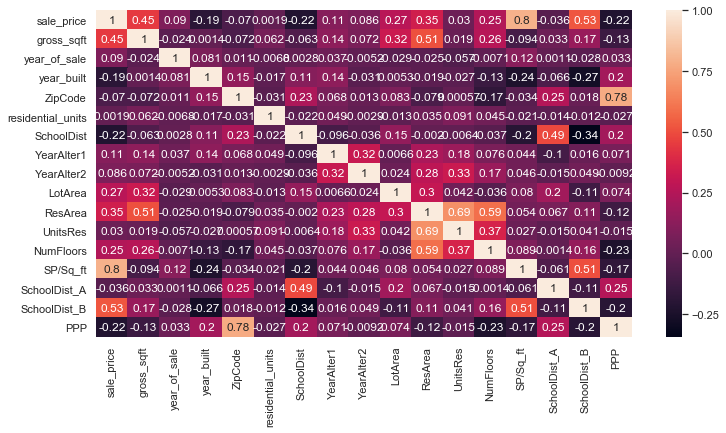

In [113]:
plt.figure(figsize = (12,6))
sns.heatmap(dfcombine3.corr(),annot = True)
plt.savefig('Heat2.png')

In [127]:

#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train3, X_test3, y_train3, y_test3 = train_test_split(dfx3, dfy, test_size=0.3, random_state=42)

In [128]:

linR = LinearRegression()
linR.fit(X_train3, y_train3)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
#the target is predicted for the test dataset
predictions = linR.predict(X_test3)
#the accuracy of the prediction is found to be.... 
linR.score(X_test3,y_test3)

0.30339421725923577

In [87]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train3, y_train3, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test3, y_test3, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 281686.3682521618
RMSE on Test set : 291166.7464400108


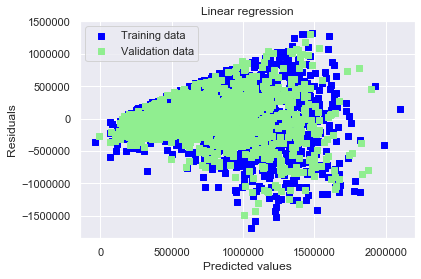

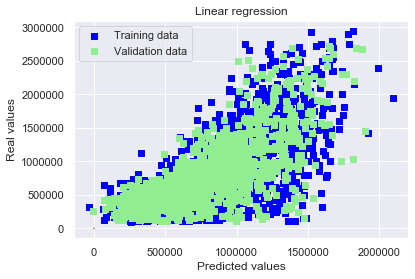

In [112]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train3, y_train3)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train3)
y_test_pred = lr.predict(X_test3)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train3, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test3, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train3, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test3, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [136]:
#OLS Regression
lir_ols = lm.OLS(endog = dfy, exog = dfx3).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sale_price   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              3188.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):                        0.00
Time:                        06:09:05   Log-Likelihood:                         -86573.
No. Observations:                6079   AIC:                                  1.732e+05
Df Residuals:                    6071   BIC:                                  1.732e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gross_sqft   298.8642     12.115     24.668      0.000     275.114     322.614
year_built   -15.5437     16.125     -0.964      0.335     -47.154      16.066
YearAlter1    53.9252     10.901      4.947      0.000      32.555      75.295
YearAlter2    30.8703     32.727      0.943      0.346     -33.285      95.026
LotArea       78.4397      5.591     14.028      0.000      67.478      89.401
ResArea       19.0997     12.203      1.565      0.118      -4.823      43.022
NumFloors   1.096e+05   1.36e+04      8.075      0.000     8.3e+04    1.36e+05
PPP        -5777.4680    404.735    -14.275      0.000   -6570.893   -4984.043
==============================================================================
Omnibus:                     1784.369   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6895.402
Skew:                           1.416   Prob(JB):                         0.00
Kurtosis:                       7.382   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""